## 1. Bitcoin e Criptomoedas
<p>Desde o <a href="https://newfronttest.bitcoin.com/bitcoin.pdf">lançamento do Bitcoin em 2008</a>, centenas de projetos semelhantes baseados na tecnologia blockchain surgiram. Chamamos essas criptomoedas (também conhecidas como coins ou cripto). Algumas são extremamente valiosas atualmente, e outras podem ter o potencial de se tornar extremamente valiosas no futuro<sup>1</sup>. Em 6 de dezembro de 2017, o Bitcoin tinha uma <a href="https://en.wikipedia.org/wiki/Market_capitalization">capitalização de mercado</a> acima de US$ 200 bilhões. </p>
<p><center>
<img src="https://assets.datacamp.com/production/project_82/img/bitcoint_market_cap_2017.png" style="width:500px"> <br> 
<em>O impressionante aumento da capitalização de mercado do Bitcoin em 2017.</em></center></p>
<p>*<sup>1</sup> <strong>AVISO</strong>: O mercado de criptomoedas é excepcionalmente volátil<sup>2</sup> e qualquer dinheiro que você investir pode desaparecer. As criptomoedas mencionadas aqui <strong>podem ser fraudes</strong> similares a <a href="https://en.wikipedia.org/wiki/Ponzi_scheme">Esquemas Ponzi</a> ou ter muitos outros problemas (sobrevalorização, técnicos, etc.). <strong>Por favor, não interprete isso como conselho de investimento</strong>. *</p>
<p>Dito isso, vamos ao trabalho. Começaremos com um CSV que baixamos convenientemente em 6 de dezembro de 2017 usando a API do coinmarketcap (OBSERVAÇÃO: a API pública tornou-se privada em 2020 e não está mais disponível) chamado <code>datasets/coinmarketcap_06122017.csv</code>. </p>

In [1]:
# Importando pandas
import pandas as pd

# Importando matplotlib e definindo estética para plotagem posterior.
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.style.use('fivethirtyeight')

# Lendo o arquivo datasets/coinmarketcap_06122017.csv com pandas
dec6 = pd.read_csv('datasets/coinmarketcap_06122017.csv')

# Selecionando as colunas 'id' e 'market_cap_usd'
market_cap_raw = dec6[['id', 'market_cap_usd']]

# Contando o número de valores
market_cap_raw.count()

id                1326
market_cap_usd    1031
dtype: int64

## 2. Descartar as criptomoedas sem capitalização de mercado
<p>Por que os contadores para <code>id</code> e <code>market_cap_usd</code> diferem acima? Isso ocorre porque algumas criptomoedas listadas no coinmarketcap.com não possuem uma capitalização de mercado conhecida, o que é representado por <code>NaN</code> nos dados, e os <code>NaN</code>s não são contados pelo <code>count()</code>. Essas criptomoedas são de pouco interesse para nós nesta análise, portanto, vamos removê-las.</p>

In [2]:
# Filtrando as linhas sem capitalização
cap = market_cap_raw.query('market_cap_usd > 0')

# Contando o número de valores novamente
cap.count()

id                1031
market_cap_usd    1031
dtype: int64

## 3. Como é o Bitcoin comparado com o restante das criptomoedas?
<p>No momento em que este texto foi escrito, o Bitcoin enfrenta séria concorrência de outros projetos, mas ainda é dominante em termos de capitalização de mercado. Vamos plotar a capitalização de mercado das 10 principais moedas em um gráfico de barras para visualizar melhor isso.</p>

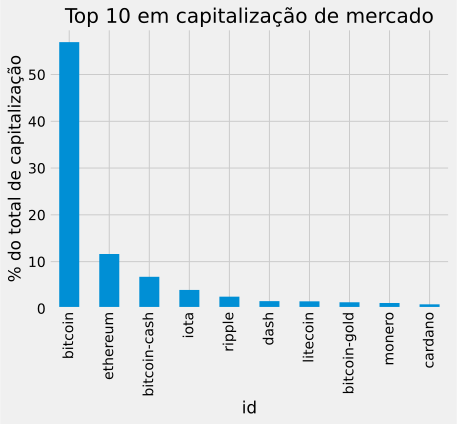

In [3]:
# Declarando esses valores agora para uso posterior nos gráficos
TOP_CAP_TITLE = 'Top 10 em capitalização de mercado'
TOP_CAP_YLABEL = '% do total de capitalização'

# Selecionando as primeiras 10 linhas e definindo o índice
cap10 = cap[:10].set_index('id')

# Calculando a porcentagem da capitalização de mercado
cap10 = cap10.assign(market_cap_perc = lambda x: (x.market_cap_usd / cap.market_cap_usd.sum()) * 100)

# Plotando o gráfico de barras com o título definido acima
ax = cap10.market_cap_perc.plot.bar(title=TOP_CAP_TITLE)

# Anotando o eixo y com o rótulo definido acima
ax.set_ylabel(TOP_CAP_YLABEL);


## 4. Tornando o gráfico mais fácil de ler e mais informativo
<p>Embora o gráfico acima seja informativo o suficiente, ele pode ser melhorado. O Bitcoin é muito grande, e as outras moedas são difíceis de distinguir por causa disso. Em vez de usar a porcentagem, vamos utilizar uma escala logarítmica base 10 da capitalização "bruta". Além disso, vamos usar cores para agrupar moedas semelhantes e tornar o gráfico mais informativo<sup>1</sup>. </p>
<p>Quanto à razão das cores: bitcoin-cash e bitcoin-gold são bifurcações do <a href="https://en.wikipedia.org/wiki/Blockchain">blockchain</a> do bitcoin<sup>2</sup>. Ethereum e Cardano ambos oferecem <a href="https://en.wikipedia.org/wiki/Smart_contract">contratos inteligentes</a> completos em Turing. Iota e Ripple não são mineráveis. Dash, Litecoin e Monero recebem suas próprias cores.</p>
<p><sup>1</sup> <em>Essa coloração é uma simplificação. Existem mais diferenças e semelhanças que não estão sendo representadas aqui.</em></p>
<p><sup>2</sup> <em>As bifurcações do bitcoin são na verdade <strong>muito</strong> diferentes, mas está fora do escopo falar sobre elas aqui. Por favor, veja o aviso acima e faça sua própria pesquisa.</em></p>

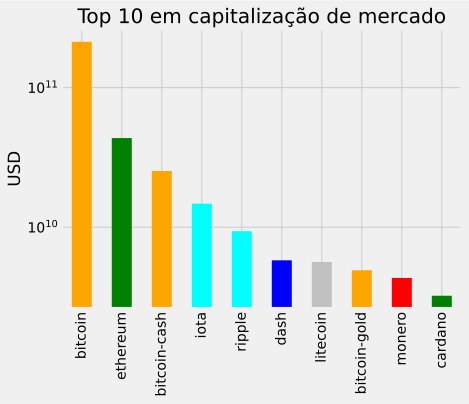

In [4]:
# Cores para o gráfico de barras
COLORS = ['orange', 'green', 'orange', 'cyan', 'cyan', 'blue', 'silver', 'orange', 'red', 'green']

# Plotando market_cap_usd como antes, mas adicionando as cores e escalando o eixo y em logarítmica
ax = cap10.market_cap_usd.plot.bar(title=TOP_CAP_TITLE, logy=True, color=COLORS)

# Anotando o eixo y com 'USD'
ax.set_ylabel('USD')

# Toque final! Removendo o xlabel, pois não é muito informativo
ax.set_xlabel('');


## 5. O que está acontecendo?! Volatilidade nas criptomoedas
<p>O mercado de criptomoedas tem sido espetacularmente volátil desde que a primeira bolsa foi aberta. Vamos explorar um pouco mais essa volatilidade! Começaremos selecionando e plotando a variação percentual de 24 horas e de 7 dias, que já temos disponíveis.</p>

In [5]:
# Selecionando as colunas id, percent_change_24h e percent_change_7d
volatility = dec6[['id', 'percent_change_24h', 'percent_change_7d']]

# Definindo o índice para 'id' e excluindo todas as linhas com NaN
volatility = volatility.set_index('id').dropna()

# Ordenando o DataFrame por percent_change_24h em ordem ascendente
volatility = volatility.sort_values('percent_change_24h')

# Verificando as primeiras linhas
volatility.head()


,percent_change_24h,percent_change_7d
id,,
flappycoin,-95.85,-96.61
credence-coin,-94.22,-95.31
coupecoin,-93.93,-61.24
tyrocoin,-79.02,-87.43
petrodollar,-76.55,542.96


## 6. Bem, já podemos ver que as coisas estão um pouco loucas
<p>Parece que você pode perder muito dinheiro rapidamente com criptomoedas. Vamos plotar os 10 maiores ganhadores e os 10 maiores perdedores em capitalização de mercado.</p>

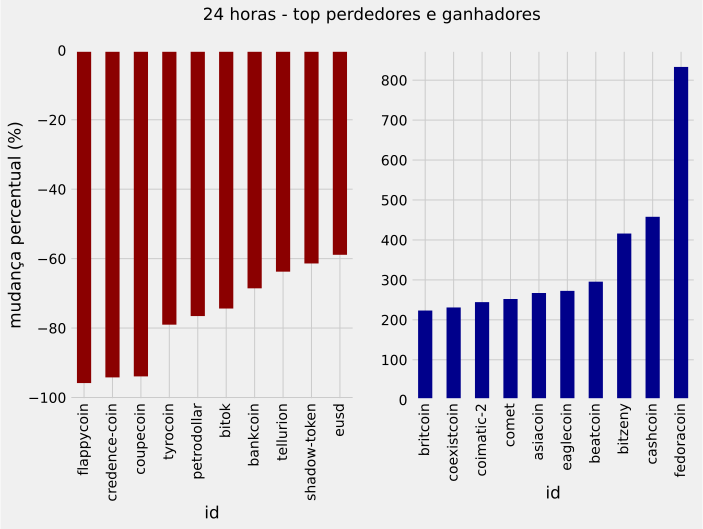

In [7]:
# Definindo uma função com 2 parâmetros, a série a ser plotada e o título
def top10_subplot(volatility_series, title):
    # Criando o subplot e a figura para dois gráficos lado a lado
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
    
    # Plotando com pandas o gráfico de barras para os 10 maiores perdedores
    ax = volatility_series[:10].plot.bar(color="darkred", ax=axes[0])
    
    # Definindo o título principal da figura com o texto passado como parâmetro
    fig.suptitle(title)
    
    # Definindo o rótulo do eixo y para 'mudança percentual (%)'
    ax.set_ylabel('mudança percentual (%)')
    
    # Repetindo o processo acima, mas para os 10 maiores ganhadores
    ax = volatility_series[-10:].plot.bar(color="darkblue", ax=axes[1])
    
    # Retornando isso por boa prática, pode ser útil mais tarde
    return fig, ax

DTITLE = "24 horas - top perdedores e ganhadores"

# Chamando a função acima com a série do período de 24 horas e o título DTITLE
fig, ax = top10_subplot(volatility.percent_change_24h, DTITLE)


## 7. Ok, isso é... interessante. Vamos verificar também a série semanal.
<p>Aumento diário de 800%?! Por que estamos fazendo este tutorial e não comprando moedas aleatórias?<sup>1</sup></p>
<p>Depois de nos acalmarmos, vamos reutilizar a função definida acima para ver o que está acontecendo na série semanal, em vez da diária.</p>

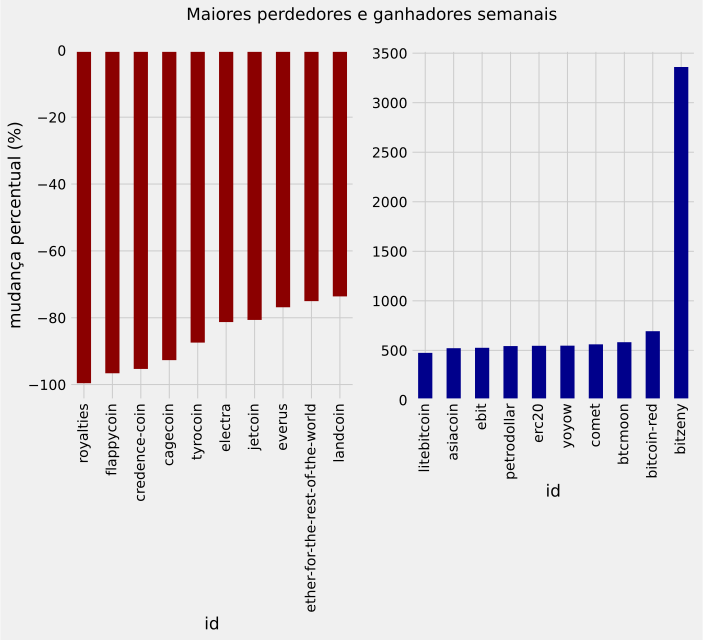

In [8]:
# Ordenando em ordem ascendente
volatility7d = volatility.sort_values("percent_change_7d")

WTITLE = "Maiores perdedores e ganhadores semanais"

# Chamando a função top10_subplot
fig, ax = top10_subplot(volatility7d.percent_change_7d, WTITLE);


## 8. Quão pequeno é pequeno?
<p>Os nomes das criptomoedas mencionadas acima são bastante desconhecidos, e existe uma flutuação considerável entre as mudanças percentuais de 1 e 7 dias. Assim como as ações e muitos outros produtos financeiros, quanto menor a capitalização, maior o risco e a recompensa. Criptomoedas menores são projetos geralmente menos estáveis e, portanto, investimentos ainda mais arriscados que os maiores<sup>1</sup>. Vamos classificar nosso conjunto de dados com base nas <a href="https://www.investopedia.com/video/play/large-cap/">definições de capitalização</a> da Investopedia para ações de empresas.</p>
<p><sup>1</sup> <em>As criptomoedas são uma nova classe de ativos, então elas não são diretamente comparáveis a ações. Além disso, não existem limites definidos para o que é considerado uma ação "pequena" ou "grande". Finalmente, alguns investidores argumentam que o bitcoin é semelhante ao ouro, o que os tornaria mais comparáveis a uma <a href="https://www.investopedia.com/terms/c/commodity.asp">commodity</a> ao invés de uma ação.</em></p>

In [9]:
# Selecionando tudo que é maior que 10 bilhões
largecaps = cap.query("market_cap_usd > 1E+10")

# Imprimindo as criptomoedas com grande capitalização
largecaps


,id,market_cap_usd
0,bitcoin,2.130493e+11
1,ethereum,4.352945e+10
2,bitcoin-cash,2.529585e+10
3,iota,1.475225e+10


## 9. A maioria das moedas é pequena
<p>Observe que muitas moedas não são comparáveis a grandes empresas em termos de capitalização de mercado, então vamos nos desviar da definição original da Investopedia, mesclando categorias.</p>

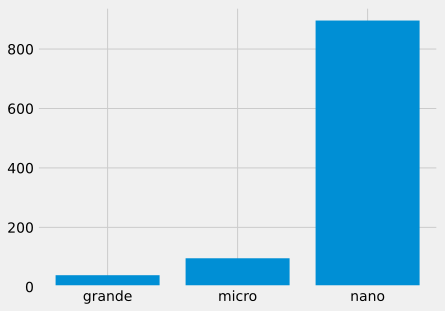

In [10]:
# Criando uma função legal para contar diferentes capitalizações de mercado do DataFrame "cap". Retorna um inteiro.
def capcount(query_string):
    return cap.query(query_string).count().id

# Rótulos para o gráfico
LABELS = ["grande", "micro", "nano"]

# Usando capcount para contar as criptomoedas "grandes"
biggish = capcount("market_cap_usd > 3E+8")

# O mesmo que acima para micro...
micro = capcount("market_cap_usd >= 5E+7 & market_cap_usd < 3E+8")

# ... e para nano
nano = capcount("market_cap_usd < 5E+7")

# Criando uma lista com as 3 contagens
values = [biggish, micro, nano]

# Plotando os valores com matplotlib
plt.bar(range(len(values)), values, tick_label=LABELS);
